In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
dados = pd.read_csv("Admission_Predict.csv")
dados.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
dados['GRE Score'] = (dados['GRE Score'] - dados['GRE Score'].min()) / (dados['GRE Score'].max() - dados['GRE Score'].min())
dados['TOEFL Score'] = (dados['TOEFL Score'] - dados['TOEFL Score'].min()) / (dados['TOEFL Score'].max() - dados['TOEFL Score'].min())
dados['University Rating'] = (dados['University Rating'] - dados['University Rating'].min()) / (dados['University Rating'].max() - dados['University Rating'].min())
dados['SOP'] = (dados['SOP'] - dados['SOP'].min()) / (dados['SOP'].max() - dados['SOP'].min())
dados['LOR '] = (dados['LOR '] - dados['LOR '].min()) / (dados['LOR '].max() - dados['LOR '].min())
dados['CGPA'] = (dados['CGPA'] - dados['CGPA'].min()) / (dados['CGPA'].max() - dados['CGPA'].min())
dados['Research'] = (dados['Research'] - dados['Research'].min()) / (dados['Research'].max() - dados['Research'].min())
dados['Chance of Admit '] = (dados['Chance of Admit '] - dados['Chance of Admit '].min()) / (dados['Chance of Admit '].max() - dados['Chance of Admit '].min())


In [4]:
dados.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,2,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,3,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,4,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,5,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063


In [20]:
media = dados['Chance of Admit '].mean()
dados[(dados[["Chance of Admit "]] >= media)] = 1
dados[(dados[["Chance of Admit "]] <= media)] = 0
dados.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,1.0
1,2,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,1.0
2,3,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.0
3,4,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,1.0
4,5,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.0


# Selecionando as colunas

In [33]:
# Armazenando na variavel X
X = dados.iloc[:, 1:6].values
X

array([[0.94      , 0.92857143, 0.75      , 0.875     , 0.875     ],
       [0.68      , 0.53571429, 0.75      , 0.75      , 0.875     ],
       [0.52      , 0.42857143, 0.5       , 0.5       , 0.625     ],
       ...,
       [0.8       , 0.85714286, 0.75      , 1.        , 0.875     ],
       [0.44      , 0.39285714, 0.5       , 0.625     , 0.75      ],
       [0.86      , 0.89285714, 0.75      , 1.        , 0.75      ]])

###  Iniciando o K-means utilizando 3 cluster

In [38]:
kmeans = KMeans(n_clusters = 3, init = 'random')

In [39]:
# executamos a função fit() para executar o algoritmo e agrupar os dados
"""
Após executar o método o Scikit-Learn retorna o objeto 
com os seus valores de cada atributo conforme especificamos ou com seus valores padrão.
"""
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
#  verificando os centroides 
kmeans.cluster_centers_

array([[0.530125  , 0.55647321, 0.4765625 , 0.615625  , 0.60625   ],
       [0.7645    , 0.76517857, 0.86458333, 0.85833333, 0.83020833],
       [0.31583333, 0.32738095, 0.23958333, 0.32083333, 0.40520833]])

In [41]:
# tabela de distâncias relação a cada cluster.
"""
cada instância contém três valores, e cada valor corresponde exatamente a
distância entre a instância de dados corrente e cada um dos quatro clusters
"""
distance = kmeans.fit_transform(X)
distance

array([[0.73333691, 1.24678065, 0.27532979],
       [0.44449591, 0.92392481, 0.28604489],
       [0.17033271, 0.45357493, 0.68052817],
       ...,
       [0.68863494, 1.21405509, 0.21471046],
       [0.23617856, 0.55406404, 0.65126797],
       [0.69360894, 1.21320854, 0.25882061]])

In [42]:
# código do cluster que a instância de dados foi atribuído.
labels = kmeans.labels_
labels

array([2, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1, 2,
       2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 1, 0, 0, 1, 0, 0, 0, 2, 2, 2,
       0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 2, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0,
       0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1,

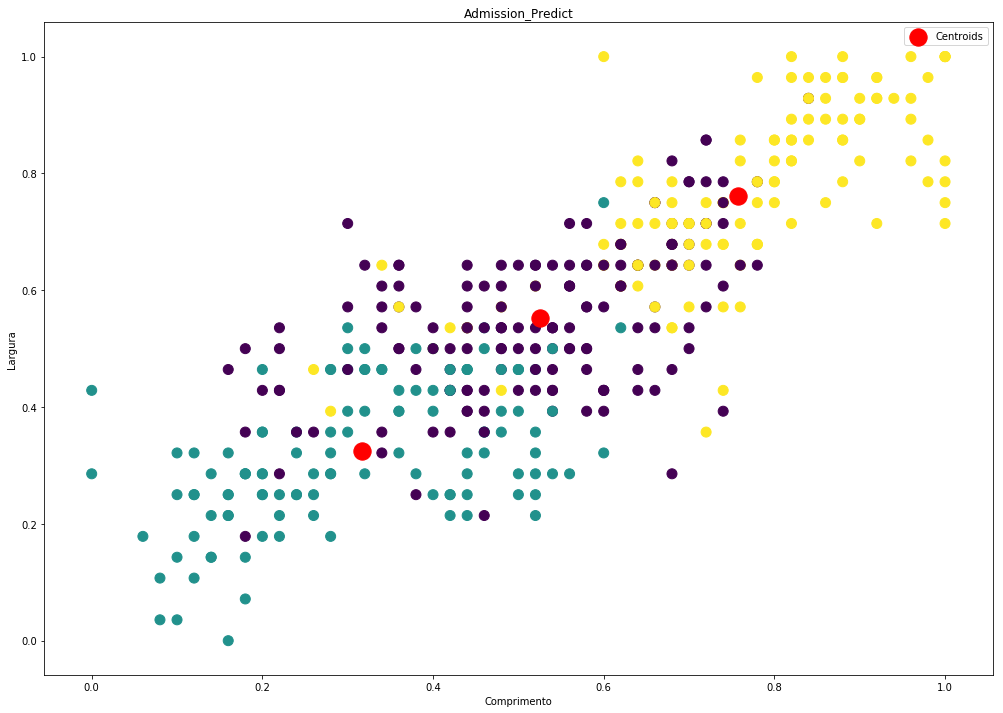

In [43]:
plt.rcParams['figure.figsize'] = (17,12)

plt.scatter(X[:, 0], X[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Admission_Predict')
plt.xlabel('Comprimento')
plt.ylabel('Largura')
plt.legend()

plt.show()

In [44]:
y = dados['Chance of Admit ']
y_pred  = kmeans.fit_predict(X)
metrics.fowlkes_mallows_score(y,y_pred)

0.5901606834656301

# Método Elbow

In [45]:
lista = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print(i,kmeans.inertia_)
    lista.append(kmeans.inertia_)  

1 117.79232686734693
2 58.03530264339377
3 41.95647558265915
4 36.92029607844785
5 32.827670369519595
6 29.98757694040363
7 27.894453587771665
8 26.444317778567417
9 25.156369714247994
10 24.450814293755126


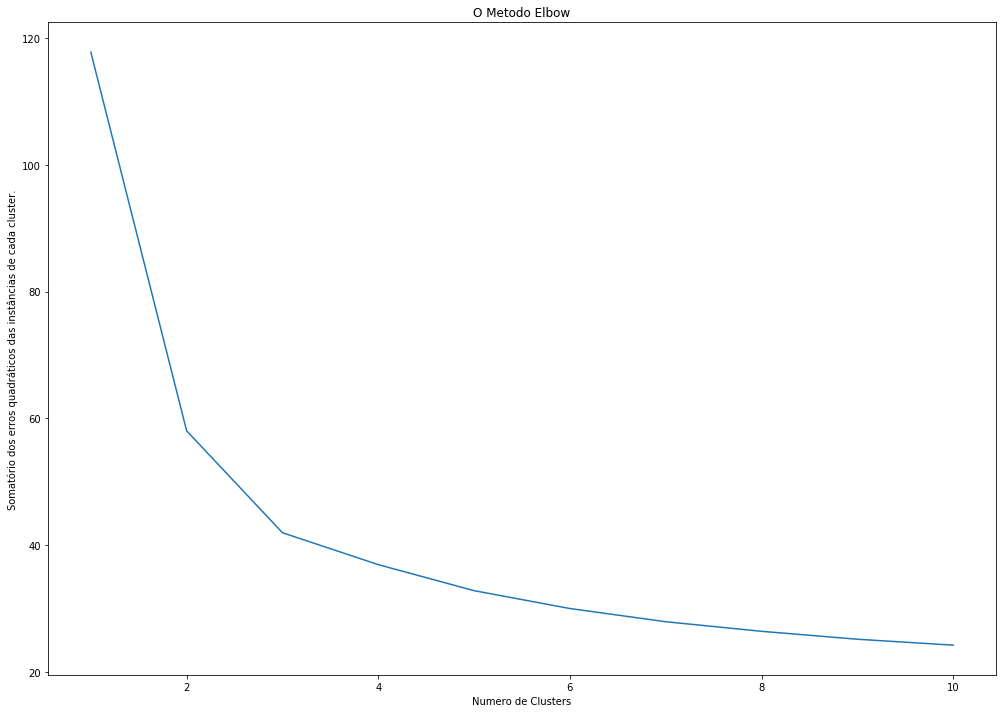

In [14]:

plt.plot(range(1, 11), lista)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('Somatório dos erros quadráticos das instâncias de cada cluster.')
plt.show()

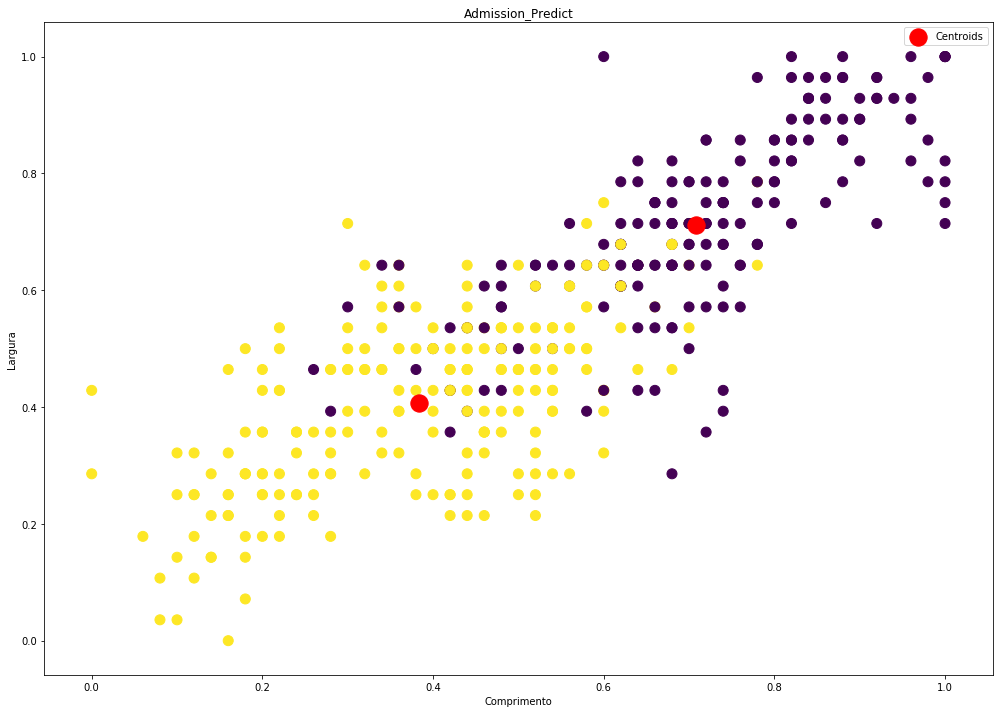

In [47]:
kmeans = KMeans(n_clusters = 2, init = 'random')
kmeans.fit(X)

plt.scatter(X[:, 0], X[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Admission_Predict')
plt.xlabel('Comprimento')
plt.ylabel('Largura')
plt.legend()

plt.show()